# A New (Structural) Classification of the World

In [1]:
import pandas as pd
import os
os.chdir('/Users/Carla/Documents/Network Analysis/sector-cluster/UN Value Added')

In [2]:
df=pd.read_csv('UNdata_20161114_185102414.csv')
df.head(10)

Country or Area  Year                                               Item  \
0     Afghanistan  2014  Agriculture, hunting, forestry, fishing (ISIC ...   
1     Afghanistan  2014        Mining, Manufacturing, Utilities (ISIC C-E)   
2     Afghanistan  2014                             Manufacturing (ISIC D)   
3     Afghanistan  2014                              Construction (ISIC F)   
4     Afghanistan  2014  Wholesale, retail trade, restaurants and hotel...   
5     Afghanistan  2014      Transport, storage and communication (ISIC I)   
6     Afghanistan  2014                        Other Activities (ISIC J-P)   
7     Afghanistan  2014                                  Total Value Added   
8     Afghanistan  2013  Agriculture, hunting, forestry, fishing (ISIC ...   
9     Afghanistan  2013        Mining, Manufacturing, Utilities (ISIC C-E)   

          Value  
0  1.586140e+11  
1  7.304891e+10  
2  6.745114e+10  
3  7.760440e+10  
4  5.386660e+10  
5  1.598200e+11  
6  1.142710e+11  
7  6.388730e+11  
8  1.528940e+11  
9  7.488088e+10

In [3]:
df.Year.value_counts()
df.shape

(70788, 4)

# To do list:
1. Do basic data cleanup.
2. Convert dataframe from long to wide.
3. Express each feature as a percentage of GDP.
4. Detrend, if needed
5. Cluster
6. Compare various algorithms

In [4]:
#Let's look at which countries are incorrectly spelled
df['Country or Area'].unique()

df['Country or Area'].replace("C\xc3\xb4te d'Ivoire", "Cote d'Ivoire", inplace=True)
df['Country or Area'].replace('Cura\xc3\xa7ao', 'Curacao', inplace=True)
df['Country or Area'].unique().shape

(212,)

In [5]:
#First step: Unstacking the dataframe.

df=df.pivot_table(values='Value', columns='Item', index=['Year','Country or Area'],)
df.columns.name=None
df.reset_index()

Year                                    Country or Area  \
0     1970                                        Afghanistan   
1     1970                                            Albania   
2     1970                                            Algeria   
3     1970                                            Andorra   
4     1970                                             Angola   
5     1970                                           Anguilla   
6     1970                                Antigua and Barbuda   
7     1970                                          Argentina   
8     1970                                              Aruba   
9     1970                                          Australia   
10    1970                                            Austria   
11    1970                                            Bahamas   
12    1970                                            Bahrain   
13    1970                                         Bangladesh   
14    1970                                           Barbados   
15    1970                                            Belgium   
16    1970                                             Belize   
17    1970                                              Benin   
18    1970                                            Bermuda   
19    1970                                             Bhutan   
20    1970                   Bolivia (Plurinational State of)   
21    1970                                           Botswana   
22    1970                                             Brazil   
23    1970                             British Virgin Islands   
24    1970                                  Brunei Darussalam   
25    1970                                           Bulgaria   
26    1970                                       Burkina Faso   
27    1970                                            Burundi   
28    1970                                         Cabo Verde   
29    1970                                           Cambodia   
...    ...                                                ...   
8849  2014                                             Sweden   
8850  2014                                        Switzerland   
8851  2014                               Syrian Arab Republic   
8852  2014                                         Tajikistan   
8853  2014                                           Thailand   
8854  2014          The former Yugoslav Republic of Macedonia   
8855  2014                                        Timor-Leste   
8856  2014                                               Togo   
8857  2014                                              Tonga   
8858  2014                                Trinidad and Tobago   
8859  2014                                            Tunisia   
8860  2014                                             Turkey   
8861  2014                                       Turkmenistan   
8862  2014                           Turks and Caicos Islands   
8863  2014                                             Tuvalu   
8864  2014                                             Uganda   
8865  2014                                            Ukraine   
8866  2014                               United Arab Emirates   
8867  2014  United Kingdom of Great Britain and Northern I...   
8868  2014              United Republic of Tanzania: Mainland   
8869  2014              United Republic of Tanzania: Zanzibar   
8870  2014                                      United States   
8871  2014                                            Uruguay   
8872  2014                                         Uzbekistan   
8873  2014                                            Vanuatu   
8874  2014                 Venezuela (Bolivarian Republic of)   
8875  2014                                           Viet Nam   
8876  2014                                              Yemen   
8877  2014                                             Zambia   
8878  2014                               

In [6]:
#Step 2. Compute for shares
    
for column in df.columns:
    new_column_name = 'Share_{}'.format(column)
    df[new_column_name] = df[column].div(df['Total Value Added'])
    
    
df.reset_index()

Year                                    Country or Area  \
0     1970                                        Afghanistan   
1     1970                                            Albania   
2     1970                                            Algeria   
3     1970                                            Andorra   
4     1970                                             Angola   
5     1970                                           Anguilla   
6     1970                                Antigua and Barbuda   
7     1970                                          Argentina   
8     1970                                              Aruba   
9     1970                                          Australia   
10    1970                                            Austria   
11    1970                                            Bahamas   
12    1970                                            Bahrain   
13    1970                                         Bangladesh   
14    1970                                           Barbados   
15    1970                                            Belgium   
16    1970                                             Belize   
17    1970                                              Benin   
18    1970                                            Bermuda   
19    1970                                             Bhutan   
20    1970                   Bolivia (Plurinational State of)   
21    1970                                           Botswana   
22    1970                                             Brazil   
23    1970                             British Virgin Islands   
24    1970                                  Brunei Darussalam   
25    1970                                           Bulgaria   
26    1970                                       Burkina Faso   
27    1970                                            Burundi   
28    1970                                         Cabo Verde   
29    1970                                           Cambodia   
...    ...                                                ...   
8849  2014                                             Sweden   
8850  2014                                        Switzerland   
8851  2014                               Syrian Arab Republic   
8852  2014                                         Tajikistan   
8853  2014                                           Thailand   
8854  2014          The former Yugoslav Republic of Macedonia   
8855  2014                                        Timor-Leste   
8856  2014                                               Togo   
8857  2014                                              Tonga   
8858  2014                                Trinidad and Tobago   
8859  2014                                            Tunisia   
8860  2014                                             Turkey   
8861  2014                                       Turkmenistan   
8862  2014                           Turks and Caicos Islands   
8863  2014                                             Tuvalu   
8864  2014                                             Uganda   
8865  2014                                            Ukraine   
8866  2014                               United Arab Emirates   
8867  2014  United Kingdom of Great Britain and Northern I...   
8868  2014              United Republic of Tanzania: Mainland   
8869  2014              United Republic of Tanzania: Zanzibar   
8870  2014                                      United States   
8871  2014                                            Uruguay   
8872  2014                                         Uzbekistan   
8873  2014                                            Vanuatu   
8874  2014                 Venezuela (Bolivarian Republic of)   
8875  2014                                           Viet Nam   
8876  2014                                              Yemen   
8877  2014                                             Zambia   
8878  2014                               

In [7]:
df.shape

(8879, 16)

In [8]:
#just to make sure that we take the first 16 columns only. the code above might loop endlessly...

#create smaller dataframe of the data
share = df.ix[:,0:16]
share = df.reset_index()
share.drop(['Share_Total Value Added',
            'Agriculture, hunting, forestry, fishing (ISIC A-B)', 
            'Construction (ISIC F)','Manufacturing (ISIC D)',
            'Mining, Manufacturing, Utilities (ISIC C-E)',
            'Other Activities (ISIC J-P)','Total Value Added', 
            'Transport, storage and communication (ISIC I)', 
            'Wholesale, retail trade, restaurants and hotels (ISIC G-H)' ], axis=1, inplace=True)

In [9]:
share.Year=share.Year.astype(str)
share['sum']=share.sum(axis=1)
#just an arbitrary computation, it is not expected that all rows will sum to one -- there is overlap between groups

# Do not run code below (or wait 5 minutes) 

In [10]:
#WARNING: Takes five minutes to run
#Prepare for motivating visualizations

os.chdir('/Users/Carla/Documents/Network Analysis/sector-cluster/UN Value Added/CountryCharts')
import matplotlib.pyplot as plt
plt.style.use('ggplot')

areaplots = share.ix[:,0:9]
plt.figure()

areaplots.set_index(['Year'], inplace=True)

#iterate through the list of countries, and create a plot
for country in areaplots['Country or Area'].unique():
    # plot.bar makes bar charts
    ax = areaplots[areaplots['Country or Area']==country].plot.bar(edgecolor=None, width=1.0, stacked=True)
    ax.legend_.remove()
    # add the country name to the top of the chart.
    ax.set_title(country)
    plt.savefig(country+'.png')
    plt.close('all')

In [10]:
os.chdir('/Users/Carla/Documents/Network Analysis/sector-cluster/UN Value Added/CountryCharts')
from IPython.display import Image
Image("SelectedCountries.png")

#First row: Volatile: Countries affected by an event at one point in time
#Second row: Stable: Countries that have been relatively stable in their economic structure
#Third row: Diversified: Countries which seemed to have some structural reform

#You can also see some data quality issues

In [11]:
Image("Legend.png", width=400)

# Part 2: Detrending

In [10]:
#Remove "share of manufacturing" -- double counting
share.drop(['Share_Manufacturing (ISIC D)', 'sum'], axis=1, inplace=True)
share.head()
share.to_csv('share.csv', sep='\t', encoding='utf-8')

**Intermediate step: Detrend the data on STATA**

The idea is to groupby.country and then detrend each column per country.  This is not straightforward in python so I had to feed the dataset in STATA.

~~~~
import delimited share.csv, clear

encode countryorarea, gen(code)
tsset code year

ren share_agrihuntingforestry ISICAB
ren share_constructionisicf ISICF
ren share_miningmanufacturingutiliti ISICCE
ren share_otheractivitiesisicjp ISICJP
ren share_transportstorageandcommuni ISICI
ren share_wholesaleretailtraderestau ISICGH

foreach x in ISICAB ISICF ISICCE ISICJP ISICI ISICGH {
gen fd_`x' = D.`x'

gen decade==.

replace decade=1970 if year>=1970 & year <=1979
replace decade=1980 if year>=1980 & year <=1989
replace decade=1990 if year>=1990 & year <=1999
replace decade=2000 if year>=2000 & year <=2009
replace decade=2010 if year>=2010 & year <=2019

collapse (mean) ISICAB-fd_ISICGH, by(countryorarea decade)
~~~~
    

In [11]:
os.chdir('/Users/Carla/Documents/Network Analysis/sector-cluster')
dtrended=pd.read_stata('detrended_collapsed.dta')
dtrended.drop(['code'],axis=1, inplace=True)
dtrended.head()

countryorarea  decade    ISICAB     ISICF    ISICCE    ISICJP     ISICI  \
0   Afghanistan  1970.0  0.726317  0.012037  0.123963  0.045496  0.036233   
1   Afghanistan  1980.0  0.691824  0.020599  0.143518  0.049145  0.038711   
2   Afghanistan  1990.0  0.579412  0.042275  0.119703  0.076596  0.060418   
3   Afghanistan  2000.0  0.404736  0.083971  0.166633  0.126547  0.131967   
4   Afghanistan  2010.0  0.253200  0.116610  0.125611  0.180843  0.236588   

     ISICGH  fd_ISICAB  fd_ISICF  fd_ISICCE  fd_ISICJP  fd_ISICI  fd_ISICGH  
0  0.045205  -0.005628  0.001434   0.003314  -0.000338  0.001451  -0.000245  
1  0.046199  -0.005019  0.000260   0.002517   0.001439  0.000299   0.000795  
2  0.118723  -0.007893  0.003317  -0.001723   0.002446  0.003414   0.000444  
3  0.083701  -0.024418  0.005216  -0.000936   0.007802  0.010427   0.002469  
4  0.085699  -0.018018  0.002809  -0.003454   0.004120  0.013560   0.001055

**Update: ** <br>
I tried running clustering on detrended data, and it didn't work. So I am running the clustering as is.

In [12]:
#clean it up now
dtrended.drop(['fd_ISICAB', 'fd_ISICF', 'fd_ISICCE', 'fd_ISICJP', 'fd_ISICI', 'fd_ISICGH'],axis=1, inplace=True)
dtrended=dtrended.dropna()
dtrended.head()

countryorarea  decade    ISICAB     ISICF    ISICCE    ISICJP     ISICI  \
0   Afghanistan  1970.0  0.726317  0.012037  0.123963  0.045496  0.036233   
1   Afghanistan  1980.0  0.691824  0.020599  0.143518  0.049145  0.038711   
2   Afghanistan  1990.0  0.579412  0.042275  0.119703  0.076596  0.060418   
3   Afghanistan  2000.0  0.404736  0.083971  0.166633  0.126547  0.131967   
4   Afghanistan  2010.0  0.253200  0.116610  0.125611  0.180843  0.236588   

     ISICGH  
0  0.045205  
1  0.046199  
2  0.118723  
3  0.083701  
4  0.085699

In [16]:
#Create different dfs per decade
df_1970s=dtrended[dtrended.decade.between(1970,1979)]
df_1980s=dtrended[dtrended.decade.between(1980,1989)]
df_1990s=dtrended[dtrended.decade.between(1990,1999)]
df_2000s=dtrended[dtrended.decade.between(2000,2009)]
df_2010s=dtrended[dtrended.decade.between(2010,2015)]

# Part 3: Clustering

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
%matplotlib inline
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import cluster, metrics

## 1970s

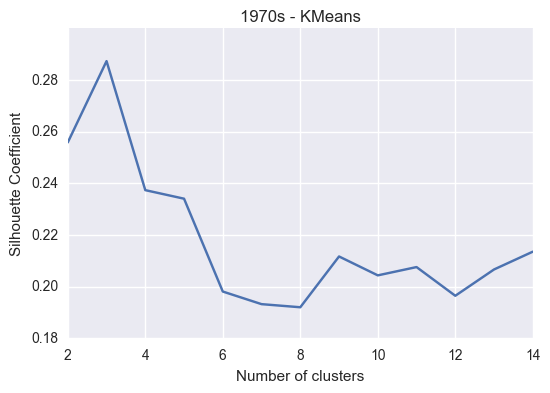

In [19]:
X_scaled = scaler.fit_transform(df_1970s.ix[:,2:8])

# calculate SC for K=2 through K=30
k_range = range(2, 15)
scores = []
for k in k_range:
    km = cluster.KMeans(n_clusters=k, random_state=12)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('1970s - KMeans')
plt.grid(True)

In [20]:
# K-means with 3 clusters on scaled data
km = cluster.KMeans(n_clusters=3, random_state=12)
km.fit(X_scaled)
df_1970s['cluster'] = km.labels_
df_1970s.sort_values(by='cluster')

writer = pd.ExcelWriter('1970-2015 KM and HC clusters.xlsx', engine='xlsxwriter')
df_1970s.to_excel(writer, sheet_name='1970s_km')

labels = km.labels_
print Counter(labels)

km_1970s = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
print metrics.silhouette_score(X_scaled, labels, metric='euclidean')

Counter({1: 103, 0: 49, 2: 25})
0.287309254863


/Users/Carla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [201]:
# calculate SC for K=2 through K=30
k_range = range(2, 15)
scores = []
for k in k_range:
    hc = AgglomerativeClustering(n_clusters=k)
    hc.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, hc.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('1970s - Hierarchical')
plt.grid(True)

In [21]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
hc = AgglomerativeClustering(n_clusters=3)
hc.fit(X_scaled)

# Clusters are given in the labels_ attribute
df_1970s['cluster'] = hc.labels_
df_1970s.sort_values(by='cluster')
df_1970s.to_excel(writer, sheet_name='1970s_hc')

labels = hc.labels_
print Counter(labels)

hc_1970s = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
print metrics.silhouette_score(X_scaled, labels, metric='euclidean')

Counter({0: 122, 2: 32, 1: 23})
0.275637268319


/Users/Carla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
from sklearn.cluster import DBSCAN

# Fit a DBSCAN estimator
db = DBSCAN(eps=1, min_samples=10)
db.fit(X_scaled)
# Clusters are given in the labels_ attribute
df_1970s['cluster'] = db.labels_
df_1970s.sort_values(by='cluster').head()

labels = db.labels_
print Counter(labels)

Counter({-1: 130, 0: 47})


/Users/Carla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## 1980s

In [23]:
X_scaled = scaler.fit_transform(df_1980s.ix[:,2:8])

# calculate SC for K=2 through K=30
k_range = range(2, 15)
scores = []
for k in k_range:
    km = cluster.KMeans(n_clusters=k, random_state=12)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('1980s - KMeans')
plt.grid(True)

In [24]:
# K-means with 3 clusters on scaled data
km = cluster.KMeans(n_clusters=3, random_state=12)
km.fit(X_scaled)
df_1980s['cluster'] = km.labels_
df_1980s.sort_values(by='cluster')
df_1980s.to_excel(writer, sheet_name='1980s_km')

labels = km.labels_
print Counter(labels)

km_1980s = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
print metrics.silhouette_score(X_scaled, labels, metric='euclidean')

Counter({1: 109, 2: 48, 0: 22})
0.271960704633


/Users/Carla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


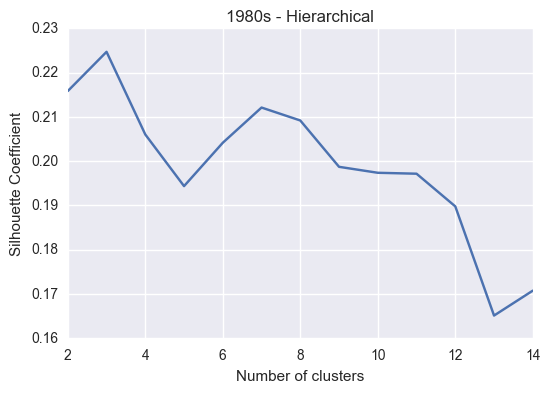

In [25]:
# calculate SC for K=2 through K=30
k_range = range(2, 15)
scores = []
for k in k_range:
    hc = AgglomerativeClustering(n_clusters=k)
    hc.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, hc.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('1980s - Hierarchical')
plt.grid(True)

In [26]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
hc = AgglomerativeClustering(n_clusters=3)
hc.fit(X_scaled)

# Clusters are given in the labels_ attribute
df_1980s['cluster'] = hc.labels_
df_1980s.sort_values(by='cluster')
df_1980s.to_excel(writer, sheet_name='1980s_hc')

labels = hc.labels_
print Counter(labels)
hc_1980s = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
print metrics.silhouette_score(X_scaled, labels, metric='euclidean')

Counter({0: 121, 2: 36, 1: 22})
0.224693915769


/Users/Carla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## 1990s

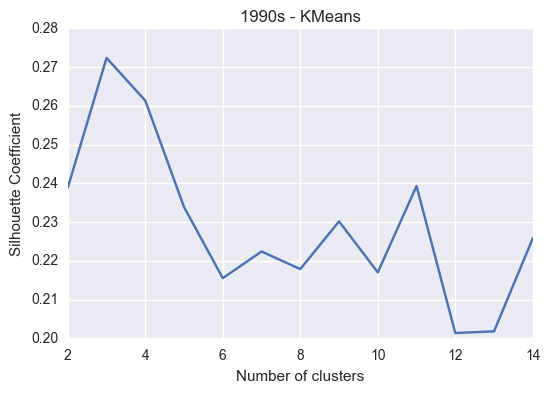

In [27]:
X_scaled = scaler.fit_transform(df_1990s.ix[:,2:8])

# calculate SC for K=2 through K=30
k_range = range(2, 15)
scores = []
for k in k_range:
    km = cluster.KMeans(n_clusters=k, random_state=12)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('1990s - KMeans')
plt.grid(True)

In [28]:
# K-means with 3 clusters on scaled data
km = cluster.KMeans(n_clusters=3, random_state=12)
km.fit(X_scaled)
df_1990s['cluster'] = km.labels_
df_1990s.sort_values(by='cluster')
df_1990s.to_excel(writer, sheet_name='1990s_km')

labels = km.labels_
print Counter(labels)

km_1990s = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
print metrics.silhouette_score(X_scaled, labels, metric='euclidean')

Counter({1: 120, 2: 62, 0: 25})
0.272358405503


/Users/Carla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


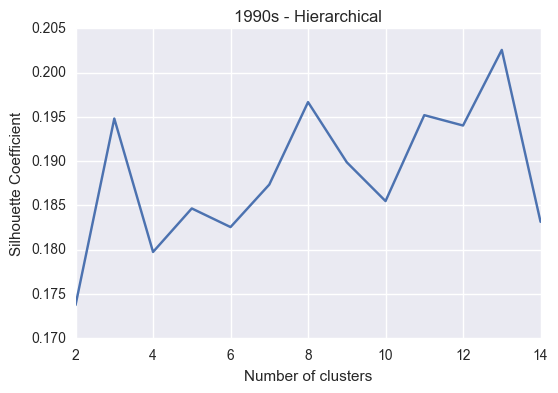

In [210]:
# calculate SC for K=2 through K=30
k_range = range(2, 15)
scores = []
for k in k_range:
    hc = AgglomerativeClustering(n_clusters=k)
    hc.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, hc.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('1990s - Hierarchical')
plt.grid(True)

In [29]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
hc = AgglomerativeClustering(n_clusters=3)
hc.fit(X_scaled)

# Clusters are given in the labels_ attribute
df_1990s['cluster'] = hc.labels_
df_1990s.sort_values(by='cluster')
df_1990s.to_excel(writer, sheet_name='1990s_hc')

labels = hc.labels_
print Counter(labels)

hc_1990s = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
print metrics.silhouette_score(X_scaled, labels, metric='euclidean')

Counter({0: 110, 1: 72, 2: 25})
0.194812917654


/Users/Carla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## 2000s

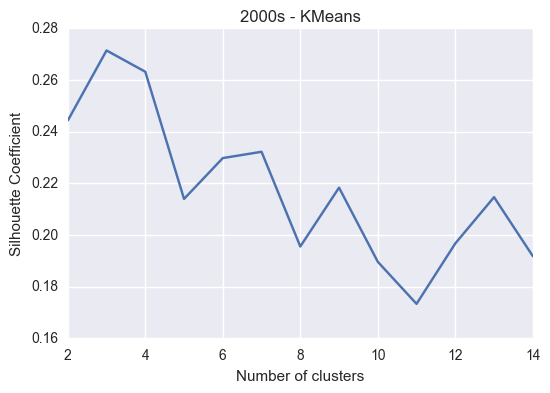

In [30]:
X_scaled = scaler.fit_transform(df_2000s.ix[:,2:8])

# calculate SC for K=2 through K=30
k_range = range(2, 15)
scores = []
for k in k_range:
    km = cluster.KMeans(n_clusters=k, random_state=12)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('2000s - KMeans')
plt.grid(True)

In [31]:
# K-means with 3 clusters on scaled data
km = cluster.KMeans(n_clusters=3, random_state=12)
km.fit(X_scaled)
df_2000s['cluster'] = km.labels_
df_2000s.sort_values(by='cluster')
df_2000s.to_excel(writer, sheet_name='2000s_km')

labels = km.labels_
print Counter(labels)
km_2000s = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
print metrics.silhouette_score(X_scaled, labels, metric='euclidean')

Counter({0: 122, 2: 52, 1: 35})
0.271433276298


/Users/Carla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


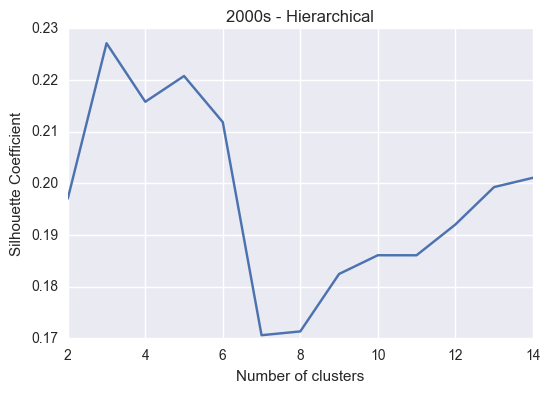

In [214]:
# calculate SC for K=2 through K=30
k_range = range(2, 15)
scores = []
for k in k_range:
    hc = AgglomerativeClustering(n_clusters=k)
    hc.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, hc.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('2000s - Hierarchical')
plt.grid(True)

In [32]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
hc = AgglomerativeClustering(n_clusters=3)
hc.fit(X_scaled)

# Clusters are given in the labels_ attribute
df_2000s['cluster'] = hc.labels_
df_2000s.sort_values(by='cluster')
df_2000s.to_excel(writer, sheet_name='2000s_hc')

labels = hc.labels_
print Counter(labels)

hc_2000s = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
print metrics.silhouette_score(X_scaled, labels, metric='euclidean')

Counter({0: 103, 1: 70, 2: 36})
0.227118150222


/Users/Carla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## 2010s

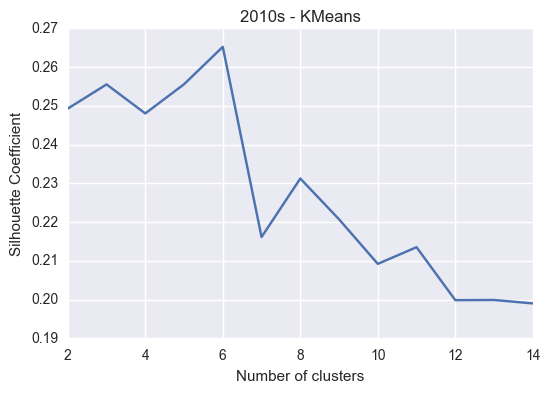

In [33]:
X_scaled = scaler.fit_transform(df_2010s.ix[:,2:8])

# calculate SC for K=2 through K=30
k_range = range(2, 15)
scores = []
for k in k_range:
    km = cluster.KMeans(n_clusters=k, random_state=12)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('2010s - KMeans')
plt.grid(True)

In [34]:
# K-means with 3 clusters on scaled data
km = cluster.KMeans(n_clusters=6, random_state=12)
km.fit(X_scaled)
df_2010s['cluster'] = km.labels_
df_2010s.sort_values(by='cluster')
df_2010s.to_excel(writer, sheet_name='2010s_km')

labels = km.labels_
print Counter(labels)

km_2010s = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
print metrics.silhouette_score(X_scaled, labels, metric='euclidean')

Counter({4: 80, 0: 40, 2: 26, 5: 26, 1: 18, 3: 16})
0.2652212976


/Users/Carla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


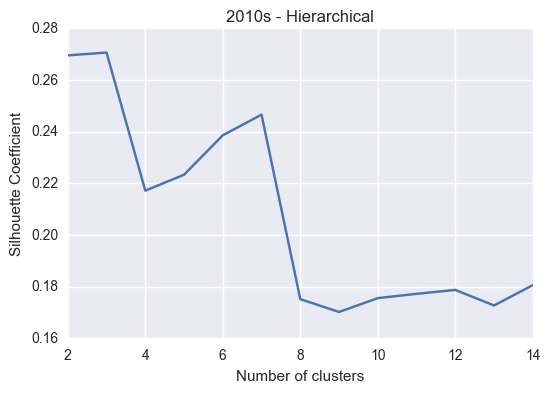

In [219]:
# calculate SC for K=2 through K=30
k_range = range(2, 15)
scores = []
for k in k_range:
    hc = AgglomerativeClustering(n_clusters=k)
    hc.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, hc.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('2010s - Hierarchical')
plt.grid(True)

In [35]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
hc = AgglomerativeClustering(n_clusters=3)
hc.fit(X_scaled)

# Clusters are given in the labels_ attribute
df_2010s['cluster'] = hc.labels_
df_2010s.sort_values(by='cluster')
df_2010s.to_excel(writer, sheet_name='2010s_hc')
writer.save()

labels = hc.labels_
print Counter(labels)

hc_2010s = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
print metrics.silhouette_score(X_scaled, labels, metric='euclidean')

/Users/Carla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Counter({0: 164, 1: 21, 2: 21})
0.270632713491


# Part 4: Robustness Checks

** Should I use K-means or Hierarchical clustering? **

In [36]:
print('K-Means Silhouette Scores:')
print'1970s  ', km_1970s
print'1980s  ', km_1980s
print'1990s  ', km_1990s
print'2000s  ', km_2000s
print'2010s  ', km_2010s

K-Means Silhouette Scores:
1970s   0.287309254863
1980s   0.271960704633
1990s   0.272358405503
2000s   0.271433276298
2010s   0.2652212976


In [37]:
print('Hierarchical Silhouette Scores:')
print'1970s  ', hc_1970s
print'1980s  ', hc_1980s
print'1990s  ', hc_1990s
print'2000s  ', hc_2000s
print'2010s  ', hc_2010s

Hierarchical Silhouette Scores:
1970s   0.275637268319
1980s   0.224693915769
1990s   0.194812917654
2000s   0.227118150222
2010s   0.270632713491


# Part 5. Making sense of the Data

In [41]:
import pandas as pd
df = pd.read_excel("1970-2015 KM and HC clusters with SummaryStats.xlsx", sheetname="SummaryStats")
df.head()

Country  Cluster 1970s  Rank 1970s  Average 1970s  Cluster 1980s  \
0  Afghanistan            0.0         NaN            NaN            2.0   
1      Albania            2.0        74.0    1214.130923            0.0   
2      Algeria            2.0        42.0    3256.584460            0.0   
3       Angola            1.0        71.0    1280.318704            1.0   
4     Anguilla            1.0         NaN            NaN            1.0   

   Rank 1980s  Average 1980s  Cluster 1990s  Rank 1990s  Average 1990s  \
0         NaN            NaN            2.0         NaN            NaN   
1        81.0    2562.876821            2.0       116.0    2826.911329   
2        52.0    5938.124224            0.0        68.0    7126.873648   
3        91.0    1924.064294            0.0       132.0    1940.301700   
4         NaN            NaN            1.0         NaN            NaN   

      ...      Rank 2010s  Average 2010s  Cluster 2010_HC  Region_dummy  \
0     ...             172    1818.119549              0.0           5.0   
1     ...             103   10344.933955              0.0           0.0   
2     ...              86   13547.124691              1.0           3.0   
3     ...             124    6458.678899              1.0           4.0   
4     ...              41   29825.721377              0.0           0.0   

   2010ISICAB  2010ISICF  2010ISICCE  2010ISICJP  2010ISICI  2010ISICGH  
0    0.253200   0.116610    0.125611    0.180843   0.236588    0.085699  
1    0.199186   0.138820    0.196074    0.259404   0.070678    0.137650  
2    0.107129   0.105842    0.369573    0.166681   0.116297    0.160263  
3    0.045935   0.086906    0.504278    0.219803   0.048531    0.091115  
4    0.026128   0.072859    0.072857    0.409701   0.114972    0.304980  

[5 rows x 24 columns]

**Header row definitions**

1. Cluster -  For the given decade, what was the cluster label (summary of results from K-Means / Hierarchical clustering above)
2. Rank - The rank of the country, in PPPPC compared to the rest of the world 
3. Average - The average GDP per capita (in PPP dollars) for each country for the given decade
4. ISIC - The 2010 shares per sector of the economy - from the original dataset

In [84]:
print "Correlation of Clusters with GDP per capita (PPP dollars)"
print "1970s:", df['Cluster 1970s'].corr(df['Rank 1970s'])*-1  #take absolute values
print "1980s:", df['Cluster 1980s'].corr(df['Rank 1980s'])
print "1990s:", df['Cluster 1990s'].corr(df['Rank 1990s'])
print "2000s:", df['Cluster 2000s'].corr(df['Rank 2000s'])
print "2010s: (KM)", df['Cluter 2010s'].corr(df['Rank 2010s'])*-1  #six clusters
print "2010s: (HC)", df['Cluster 2010_HC'].corr(df['Rank 2010s']) #three clusters - just to run a robustness test

Correlation of Clusters with GDP per capita (PPP dollars)
1970s: 0.699225355443
1980s: 0.6530658344
1990s: 0.628873055818
2000s: 0.544806898754
2010s: (KM) 0.016198906498
2010s: (HC) 0.367918615678


** Finding #1 : ** The relationship between income and country groupings have declined over time.  Income, measured by GDP, could explain how countries group together in the 1970s (with an impressive 70% correlation). But this number has declined slowly over time. In the 2000s, it is down to 54%.  And since 2010, income measures fail to inform the cluster groups. <br> <br>

So what other variables can we test?  We are looking for the factor that defines country groups in the present time.

Let's try **region**.

In [85]:
print "Correlation of Clusters with Region (Africa, Europe, Americas, Asia, etc.)"
print "2010s: (KM)", df['Cluter 2010s'].corr(df['Region_dummy'])*-1  #six clusters
#print "2010s: (HC)", df['Cluster 2010_HC'].corr(df['Region_dummy'])  #three clusters

Correlation of Clusters with Region (Africa, Europe, Americas, Asia, etc.)
2010s: (KM) 0.082789964173


**Finding #2:** Regional information still do not inform the cluster groupings.

Let's test different sectors.

In [95]:
print "Correlation of Clusters with different sectors of the economy."
print "2010 ISICAB: (KM)", df['Cluter 2010s'].corr(df['2010ISICAB'])  #six clusters
print "2010 ISICF: (KM)", df['Cluter 2010s'].corr(df['2010ISICF'])*-1  #six clusters
print "2010 ISICCE: (KM)", df['Cluter 2010s'].corr(df['2010ISICCE'])*-1  #six clusters
print "2010 ISICJP: (KM)", df['Cluter 2010s'].corr(df['2010ISICJP']) #six clusters
print "2010 ISICI: (KM)", df['Cluter 2010s'].corr(df['2010ISICI'])*-1  #six clusters
print "2010 ISICGH: (KM)", df['Cluter 2010s'].corr(df['2010ISICGH'])*-1  #six clusters

Correlation of Clusters with different sectors of the economy.
2010 ISICAB: (KM) 0.161243735252
2010 ISICF: (KM) 0.20600142179
2010 ISICCE: (KM) 0.255586347709
2010 ISICJP: (KM) 0.341363230757
2010 ISICI: (KM) 0.505339423178
2010 ISICGH: (KM) 0.0693089160196


**Finding #3:** ISIC I seems to inform the clusters.  The correlation is 0.51.  What is ISIC I?

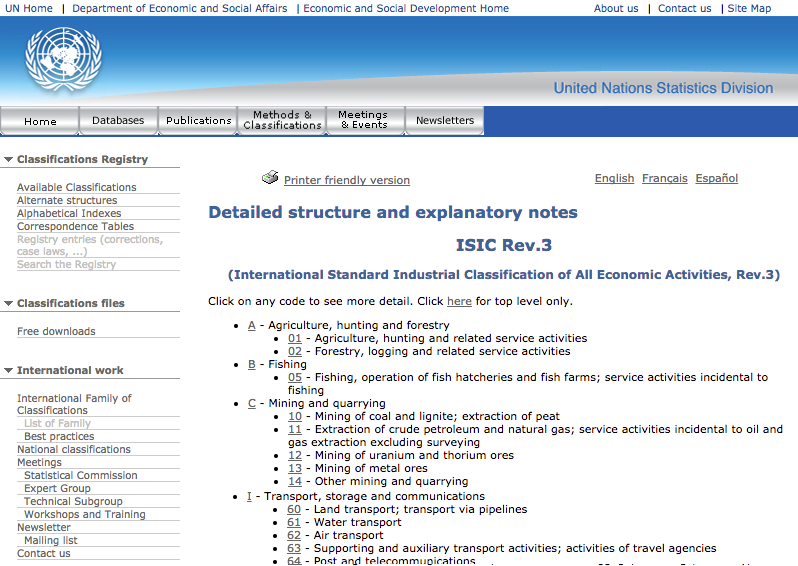

In [98]:
from IPython.display import Image
Image("UN screenshot.png")

### Policy implication:  

We ought to consider that income or regional groupings may not be representative of how countries clusters today.  <br>This said, ascribing policy based on income groups, or region, may not be as effective as in the past.
<br>It is likely that countries group themselves today based on how well-connected they are with others. <br><br> *The strong correlation of clusters with ISIC I, may imply that the strength of transport and ICT networks can explain clustering behavior. Similarly, the results may also suggest the impact of trade (or the flow of goods and services) on clustering behavior.**

Sources:

1) To unstack the DF: http://stackoverflow.com/questions/17333644/pandas-dataframe-transforming-frame-using-unique-values-of-a-column
